In [66]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib 
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [67]:
print("Seaborn version: ",sns.__version__)
print("Pandas version: ",pd.__version__)
#print(matplotlib.__version__)
print('matplotlib: {}'.format(matplotlib.__version__))
print("sklearn version: ", sklearn.__version__)

Seaborn version:  0.9.0
Pandas version:  0.24.2
matplotlib: 3.1.0
sklearn version:  0.21.2


In [43]:
df = pd.read_csv("Mall_Customers.csv")

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [46]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [47]:
df.describe(include = 'all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


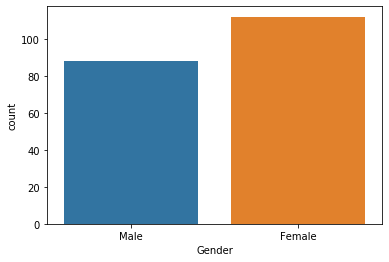

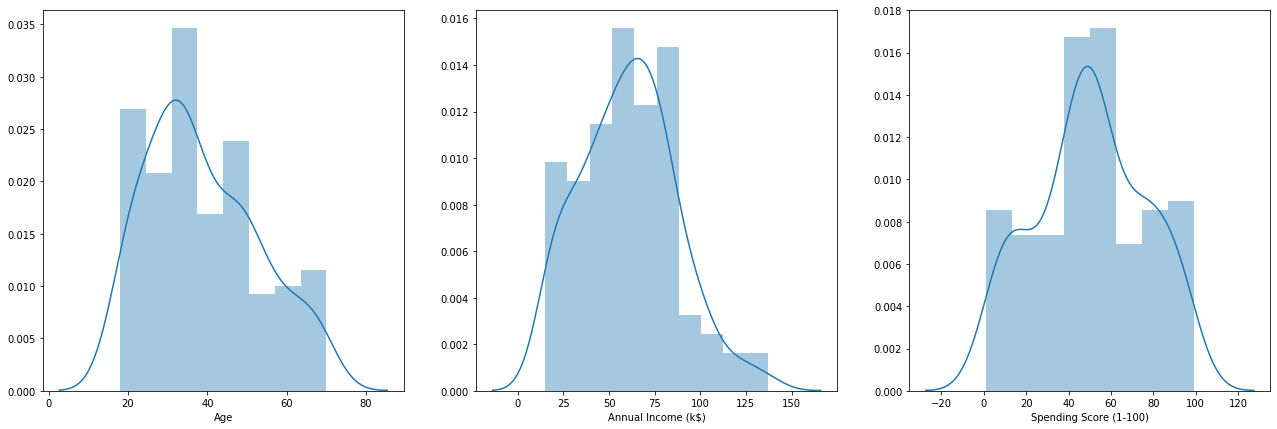

In [49]:
sns.countplot(df['Gender'])
plt.show()
f, ax = plt.subplots(figsize= (22,7))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
#plt.show()
plt.subplot(1,3,2)
sns.distplot(df['Annual Income (k$)'])
#plt.show()
plt.subplot(1,3,3)
sns.distplot(df['Spending Score (1-100)'])
#plt.show()

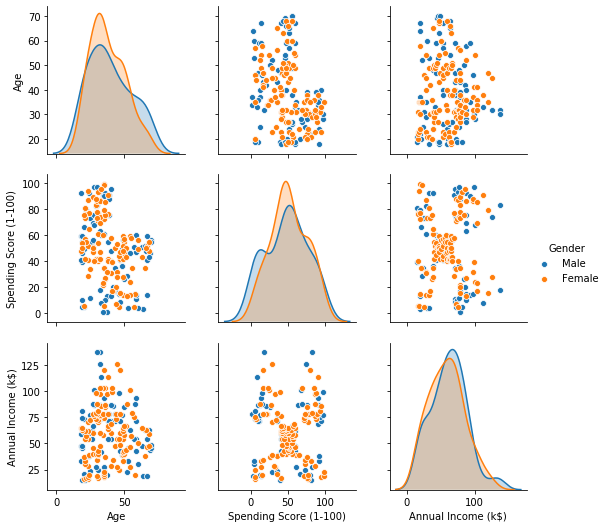

In [50]:
sns.pairplot(df, vars = ["Age", "Spending Score (1-100)", "Annual Income (k$)"], hue = 'Gender')

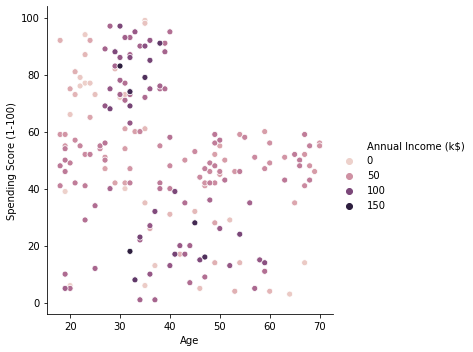

In [51]:
sns.relplot(x='Age', y='Spending Score (1-100)', hue ='Annual Income (k$)', data = df)

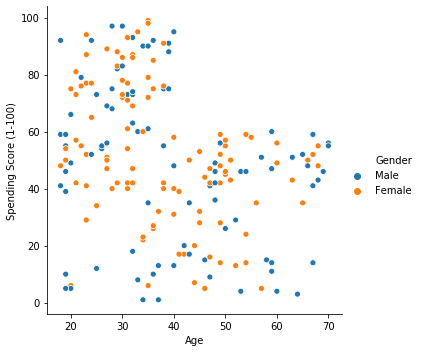

In [52]:
sns.relplot(x='Age', y='Spending Score (1-100)', hue ='Gender', data = df)

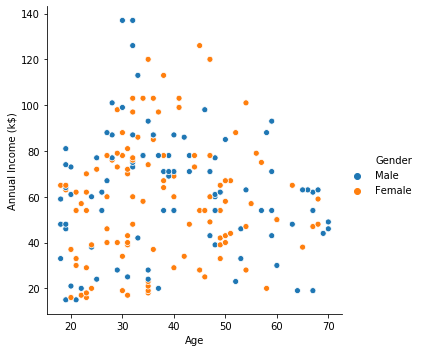

In [53]:
sns.relplot(x='Age', y='Annual Income (k$)', hue ='Gender', data = df)

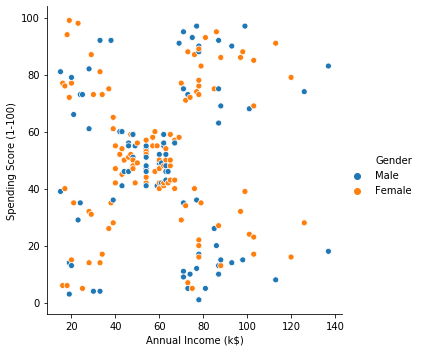

In [54]:
sns.relplot(x='Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender', data = df)

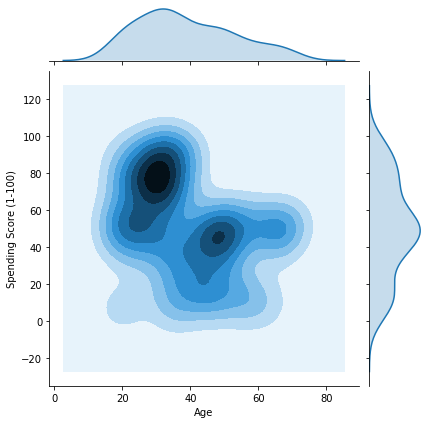

In [55]:
sns.jointplot(df['Age'], df['Spending Score (1-100)'], kind = 'kde' )

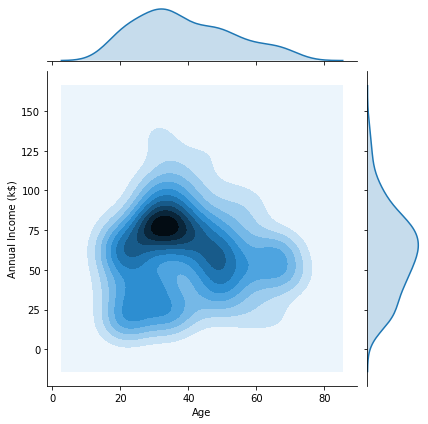

In [56]:
sns.jointplot(df['Age'], df['Annual Income (k$)'], kind = 'kde' )

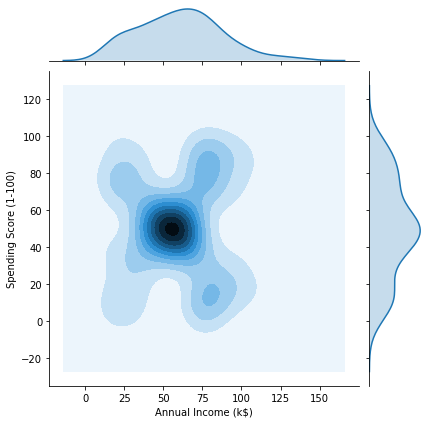

In [57]:
sns.jointplot(df['Annual Income (k$)'], df['Spending Score (1-100)'], kind = 'kde' )

Mean of male spending score:  48.51136363636363
Mean of female spending score:  51.526785714285715


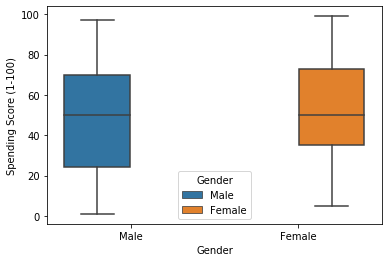

In [58]:
sns.boxplot(x="Gender", y="Spending Score (1-100)", hue = 'Gender', data=df)
data_male = df[df.Gender == 'Male']
data_female = df[df.Gender == 'Female']
print("Mean of male spending score: ", data_male['Spending Score (1-100)'].mean())
print("Mean of female spending score: ", data_female['Spending Score (1-100)'].mean())


In [59]:
df.cov()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,3350.000000,-21.638191,1486.050251,20.678392
Age,-21.638191,195.133166,-4.548744,-118.040201
Annual Income (k$),1486.050251,-4.548744,689.835578,6.716583
Spending Score (1-100),20.678392,-118.040201,6.716583,666.854271


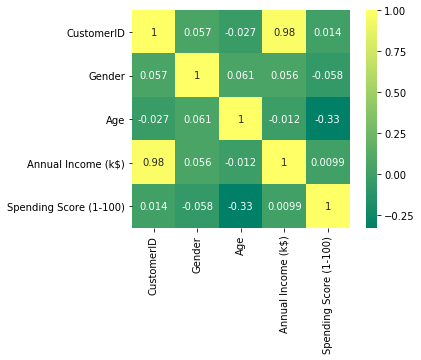

In [60]:
df['Gender']= df['Gender'].map({'Male':1,'Female':0})
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True, cmap = 'summer')

In [61]:
from sklearn.cluster import KMeans
def kmeans(X, n_clusters):
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    return y_pred


def plot_clusters(algo_name, y_pred, x_label,y_label):
    plt.scatter(X[:,0], X[:,1],c=y_pred,cmap='Paired')
    plt.title(algo_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

In [62]:
X=df.iloc[:,3:].to_numpy()

silhouette_scores = {}


for k in range(2,10):
    y_pred = kmeans(X,k)
    silhouette_scores[k]= silhouette_score(X,y_pred)

In [63]:
silhouette_scores

{2: 0.2968969162503008,
 3: 0.46761358158775435,
 4: 0.4931963109249047,
 5: 0.553931997444648,
 6: 0.53976103063432,
 7: 0.5288104473798049,
 8: 0.4539560903726814,
 9: 0.45819645551960536}

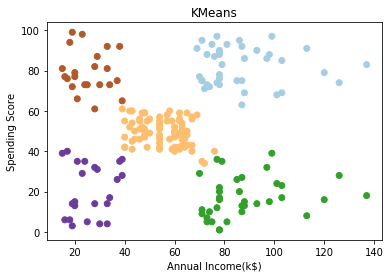

In [64]:
y_pred= kmeans(X,5)
plot_clusters("KMeans",y_pred,"Annual Income(k$)","Spending Score")